In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing the dataset
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
x = df.drop(columns=['math_score'], axis=1)
y = df['math_score']


In [9]:
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()
print(f'Numerical columns: {num_cols}')
print(f'Categorical columns: {cat_cols}')

Numerical columns: ['reading_score', 'writing_score']
Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


In [11]:
X = preprocessor.fit_transform(x)
X.shape, y.shape

((1000, 19), (1000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC()

}

In [26]:
model_list = []
r2_list = []
mae_list = []
mse_list = []
rmse_list = []


In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    model_list.append(name)
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    print(f'{name}:\n R2: {r2}\n MAE: {mae}\n MSE: {mse}\n RMSE: {rmse}\n')

Linear Regression:
 R2: 0.8804332983749565
 MAE: 4.214763142474849
 MSE: 29.095169866715466
 RMSE: 5.3939938697328405

Ridge Regression:
 R2: 0.880593148502874
 MAE: 4.211100688014259
 MSE: 29.05627219234827
 RMSE: 5.3903870169356365

Lasso Regression:
 R2: 0.825320079562973
 MAE: 5.157879138921816
 MSE: 42.50633235127344
 RMSE: 6.519688056285626

Random Forest:
 R2: 0.8510459684035803
 MAE: 4.6748
 MSE: 36.246235722222224
 RMSE: 6.020484675025942

XGBoost:
 R2: 0.8212205171585083
 MAE: 5.1036295890808105
 MSE: 43.50392150878906
 RMSE: 6.595750261250729

CatBoost:
 R2: 0.8516318920747058
 MAE: 4.612531714976557
 MSE: 36.10365799356841
 RMSE: 6.008631956907363

AdaBoostClassifier:
 R2: 0.24662527574768311
 MAE: 10.375
 MSE: 183.325
 RMSE: 13.539756275502155

SVC:
 R2: 0.6096999076183619
 MAE: 7.265
 MSE: 94.975
 RMSE: 9.745511787484533



In [29]:
results = pd.DataFrame({
    'Model': model_list,
    'R2': np.round(r2_list, 3),
    'MAE': np.round(mae_list, 3),
    'MSE': np.round(mse_list, 3),
    'RMSE': np.round(rmse_list, 3)
})
results = results.sort_values(by='R2', ascending=False).reset_index(drop=True)
results

,Model,R2,MAE,MSE,RMSE
0,Ridge Regression,0.881,4.211,29.056,5.390
1,Linear Regression,0.880,4.215,29.095,5.394
2,CatBoost,0.852,4.613,36.104,6.009
3,Random Forest,0.851,4.675,36.246,6.020
4,Lasso Regression,0.825,5.158,42.506,6.520
5,XGBoost,0.821,5.104,43.504,6.596
6,SVC,0.610,7.265,94.975,9.746
7,AdaBoostClassifier,0.247,10.375,183.325,13.540


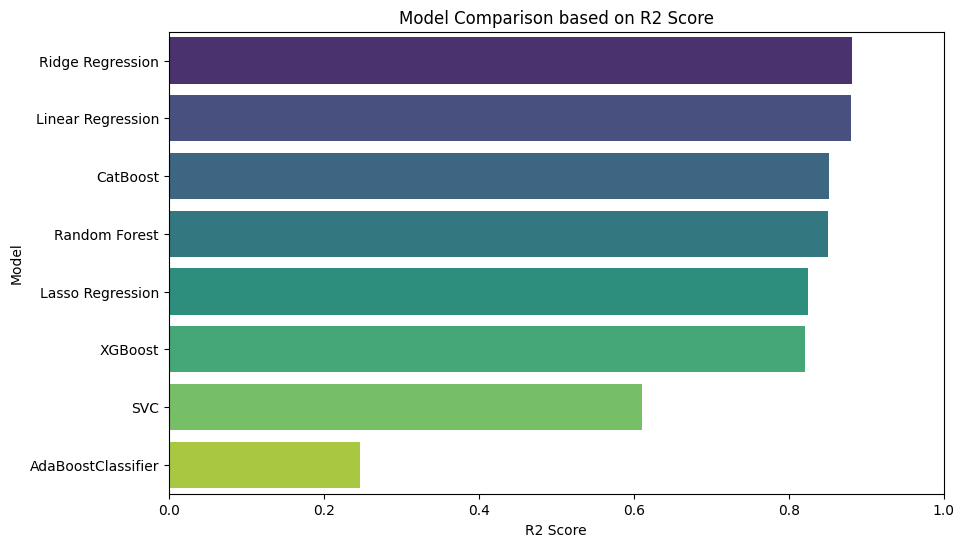

In [30]:
# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results, palette='viridis')
plt.title('Model Comparison based on R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

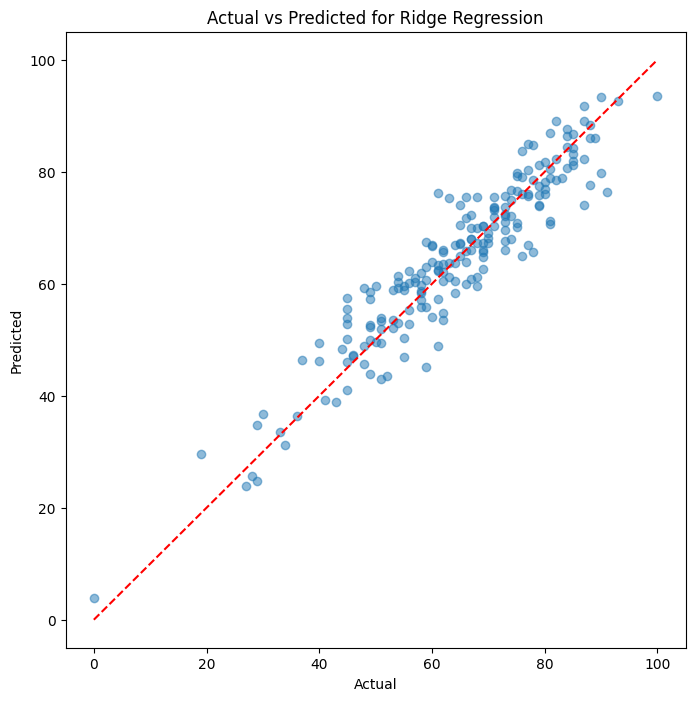

In [31]:
# Actual vs Predicted plot for the best model
best_model_name = results.loc[0, 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for {best_model_name}')
plt.show()

In [32]:
# model accuracy
accuracy = best_model.score(X_test, y_test) * 100
print(f'Accuracy of the best model ({best_model_name}): {accuracy:.2f}%')

Accuracy of the best model (Ridge Regression): 88.06%


In [33]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best, 'Difference': y_test - y_pred_best})
pred_df.head(10)

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
678,81,78.915450,2.084550
626,69,64.715227,4.284773
513,54,53.044761,0.955239
859,87,74.115900,12.884100
136,51,49.366847,1.633153
